### This Jupyter notebook will analyze the water only md data

In [1]:
import matplotlib.pyplot as mplt
import mdtraj as mdt
import numpy as np

In [2]:
cd ..

/home/hv454/comp-lab-class-2023/Week4


In [3]:
cd Setup/water_only_charmm/gromacs/

/home/hv454/comp-lab-class-2023/Week4/Setup/water_only_charmm/gromacs


In [13]:
ls

README                     step5_1.xtc       step5_6.gro
cla.xvg                    step5_1_prev.cpt  step5_6.log
combined.trr               step5_2.cpt       step5_6.tpr
combined.xtc               step5_2.edr       step5_6.trr
concatenation.sbatch       step5_2.gro       step5_6.xtc
index.ndx                  step5_2.log       step5_6_prev.cpt
md_water.xtc               step5_2.tpr       step5_7.cpt
md_wateronly.xtc           step5_2.trr       step5_7.edr
mdout.mdp                  step5_2.xtc       step5_7.gro
run_setup.sbatch           step5_2_prev.cpt  step5_7.log
slurm-40416307.out         step5_3.cpt       step5_7.tpr
slurm-40445526.out         step5_3.edr       step5_7.trr
sod.xvg                    step5_3.gro       step5_7.xtc
step3_input.gro            step5_3.log       step5_7_prev.cpt
step3_input.pdb            step5_3.tpr       step5_8.cpt
step3_input.psf            step5_3.trr       step5_8.edr
step4.0_minimization.edr   step5_3.xtc       step5_8.gro
step4.0_minimization.

In [5]:
pwd

'/home/hv454/comp-lab-class-2023/Week4/Setup/water_only_charmm/gromacs'

In [9]:
traj = traj = mdt.load_xtc('/home/hv454/comp-lab-class-2023/Week4/Setup/water_only_charmm/gromacs/md_water.xtc', top='topol.gro')

In [11]:
#First, we will compute the MSD for each atom

def msd(traj):
    msd = np.zeros((traj.n_frames, traj.n_atoms))
    for i in range(traj.n_frames):
        for j in range(traj.n_atoms):
            msd[i,j] = np.sum((traj.xyz[i,j,:] - traj.xyz[0,j,:])**2)
    return msd

In [12]:
#Next, we will compute the MSD for the oxgen atoms

#compute msd for oxygen atoms
def msd_oxygen(traj):
    msd = np.zeros((traj.n_frames, traj.n_atoms))
    for i in range(traj.n_frames):
        for j in range(traj.n_atoms):
            if traj.top.atom(j).name == 'OH2':
                msd[i,j] = np.sum((traj.xyz[i,j,:] - traj.xyz[0,j,:])**2)
    return msd

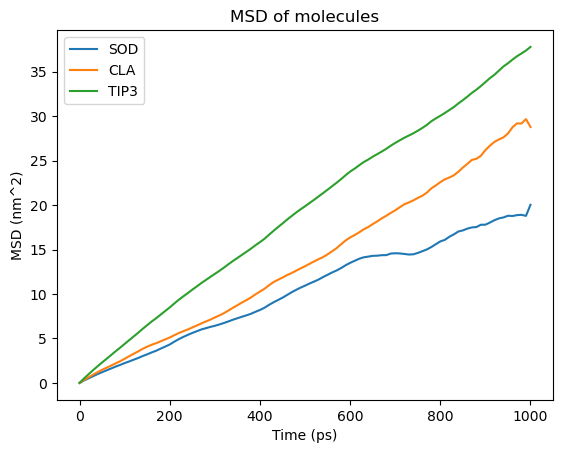

In [14]:
#Now, we will setup the parameters for sodium and calcium
x_sod, y_sod = np.loadtxt('/home/hv454/comp-lab-class-2023/Week4/Setup/water_only_charmm/gromacs/sod.xvg', comments=["@","#"],unpack=True)
x_cla, y_cla = np.loadtxt('/home/hv454/comp-lab-class-2023/Week4/Setup/water_only_charmm/gromacs/cla.xvg', comments=["@","#"],unpack=True)
x_tip3, y_tip3 = np.loadtxt('/home/hv454/comp-lab-class-2023/Week4/Setup/water_only_charmm/gromacs/tip3.xvg', comments=["@","#"],unpack=True)

#Next, we will plot the MSD for the above molecules 
mplt.plot(x_sod,y_sod, label='SOD')
mplt.plot(x_cla,y_cla, label='CLA')
mplt.plot(x_tip3,y_tip3, label='TIP3')
mplt.legend()
mplt.xlabel('Time (ps)')
mplt.ylabel('MSD (nm^2)')
mplt.title('MSD of molecules')
mplt.show()